<font size="6"> <em>srank</em> </font>  


In [2]:
import numpy as np
inf=float("inf")

from scipy.spatial.distance import cdist, pdist, squareform
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import _pickle as pickle

from ripser import ripser

<a id='main_index'></a>
<hr style="height: 0.3px;"/>

- [**Distance**](#Bdistance_class)  class
   - [**square_form**](#distance_square_form)  distance methods
   - [**radius**](#distance_radius)  distance methods
   - [**get_ldp**](#distance_get_ldp)  distance method
   - [**get_h0sr**](#distance_get_h0sr) distance method
   - [**get_bc**](#distance_get_bc) distance method

- [**Sample**](#sample_class) class
- [**get_sample**](#get_sample_method) global method





<a id='distance_class'></a> 
<hr style="height: 0.3px;"/>

<font size="5"> <em>Distance</em></font>  &emsp;&emsp;&emsp; class &emsp;&emsp;&emsp;  [Index](#main_index)

<font size="4"> <code>Distance(d)</code> </font>     

To define a distance object we use the method **Distance** for which we need to specify either:
- string "empty", or
- square symmetric 2-D nd array of real numbers with 0 on the diagonal (square form).


size of D0: 2
size of D1: 2
size of D2: 5
size of D3: 100
************************************************************
content of D0: [['' 'empty']
 ['empty' '']]
content of D1: [[0.]]
content of D2: [1. 2. 3. 5. 1. 6. 2. 2. 3. 2.]
content of D3:
[1.36305545 0.52132657 0.31194388 ... 1.03892622 0.27281494 1.20318788]
************************************************************
representing points of D5


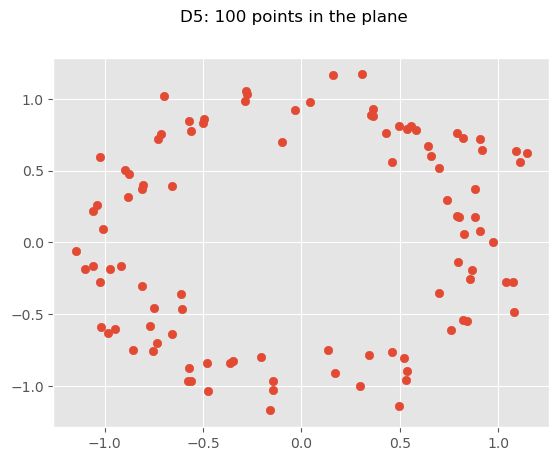

In [6]:
D0 = sr.Distance("empty")
D1 = sr.Distance(np.array([], dtype="double"))
D2 = sr.Distance(np.array([[0, 1, 2, 3, 5], [1, 0, 1, 6, 2], [2, 1, 0, 2, 3], [3, 6, 2, 0, 2], [5, 2, 3, 2, 0]], dtype="double"))

# Fixing the seed, so repeating the experiment will produce the same results
np.random.seed(0)

# D53 is define as 100 points on the plain with the Euclidean  distance.
# Fixing necessary parameters to obtain first an EucObject
size = 100
T = np.random.uniform(high = 2*np.pi, size = size)
Y = np.sin(T) * (1)
X = np.cos(T) * (1)
sd = 0.2 * 0.635
pdf = st.norm(loc = [0,0],scale =(sd,sd))
N = pdf.rvs((size, 2))
points = N+np.vstack((X, Y)).transpose()


# Converting EucObject into distance 
D3 = sr.Distance(squareform(pdist(points, metric="euclidean")))


# printing atributes
print("size of D0:",D0.size())
print("size of D1:",D1.size())
print("size of D2:",D2.size())
print("size of D3:",D3.size())

print('*' * 60)

print("content of D0:", D0.content)
print("content of D1:", D1.content)
print("content of D2:", D2.content)
print("content of D3:")
print(D3.content)

print('*' * 60)
print("representing points of D5")


# plotting the obtained euclidean object
fig=plt.figure("100 points in the plane")
fig.suptitle("D5: 100 points in the plane")
plt.scatter(points[:, 0], points[:,1])


<a id='distance_get_h0sr'></a> 
<hr style="height: 0.3px;"/>

<font size="3"> <em>get_h0sr</em></font> &emsp;&emsp;&emsp; distance method   &emsp;&emsp;&emsp;  [Index](#main_index)  

<font size="4"><code>get_h0sr(self, sample=None, clustering_method="single")</code> </font>   

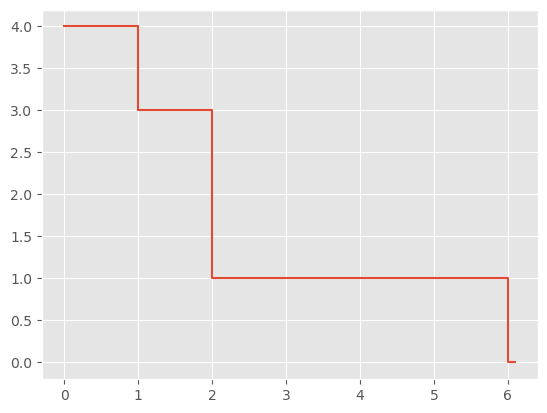

In [9]:
# specifying a distance object
D=sr.Distance(np.array([[0, 1, 2, 3, 5], [1, 0, 1, 6, 2], [2, 1, 0, 2, 3], [3, 6, 2, 0, 2], [5, 2, 3, 2, 0]], dtype="double"))


# specifying parameters
clustering_method = "complete"


# extracting stable ranks

f = D.get_h0sr(clustering_method=clustering_method)

# plotting the stable ranks

f.plot()


<a id='distance_get_bc'></a> 
<hr style="height: 0.3px;"/>

<font size="3"> <em>get_bc</em></font>  &emsp;&emsp;&emsp; distance method   &emsp;&emsp;&emsp;  [Index](#main_index)  

<font size="4"> <code>get_bc(self, maxdim=1, thresh=inf, coeff=2)</code> </font> 

when sample_ob is a Sample object:
{'H0': <stablerank.barcodes.BC object at 0x337780c90>, 'H1': <stablerank.barcodes.BC object at 0x3376c6010>}
************************************************************


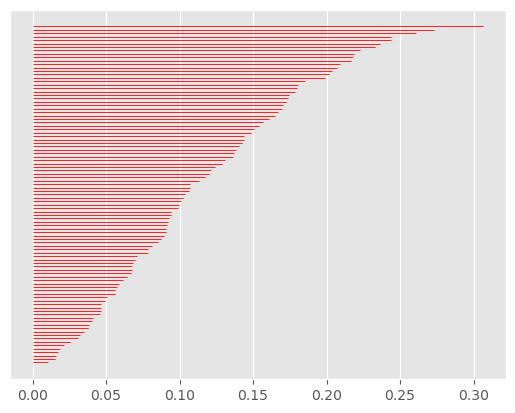

In [12]:
# specifying a distance object
D=sr.Distance(np.array([[0, 1, 2, 3, 5], [1, 0, 1, 6, 2], [2, 1, 0, 2, 3], [3, 6, 2, 0, 2], [5, 2, 3, 2, 0]], dtype="double"))


maxdim = 1
b = D3.get_bc(maxdim=maxdim)

# printing the outcome

print("when sample_ob is a Sample object:")
print(b)

print('*' * 60)
# plotting one of the bar_codes
b["H0"].plot()

<a id='bc_to_sr'></a> 
<hr style="height: 0.3px;"/>

<font size="3"> <em>bc_to_sr</em></font>  &emsp;&emsp;&emsp;  [Index](#main_index)  

<font size="4"> <code>bc_to_sr(bar_code, degree="H1")</code> </font> 

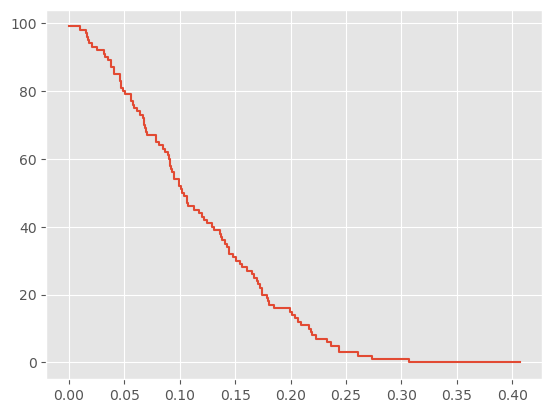

In [15]:
f = sr.bc_to_sr(b, degree="H0")
f.plot()

<a id='sample_class'></a> 
<hr style="height: 2px;"/>

<font size="5"> <em>Sample</em></font>   &emsp;&emsp;&emsp; class  &emsp;&emsp;&emsp;  [Index](#main_index)

<font size="4"> <code>srank.Sample(s, out_of)</code> </font>    

To define a Sample, that represents a sampling, we use the method **Sample** for which we need to specify a 2-d nd-array of integers. The values or the rows of the array specify which  indices of the points of the object the Sample is taken from. 

<a id='euc_object_get_sample'></a> 
<hr style="height: 0.3px;"/>

<font size="3"> <em>get_sample</em></font>   &emsp;&emsp;&emsp;  [Index](#main_index)

<font size="4"> <code>srank.get_sample(number_instances, sample_size, probabilities)</code> </font> 

In [19]:
# specifying parameters
number_instances = 5
sample_size = 3


# sampling with uniform Distribution
sample_ob1 = sr.get_sample(number_instances, sample_size, points.shape[0])

# sampling with chosen probabilities

probabilities = np.random.uniform(high = 1, size = points.shape[0])
sample_ob2 = sr.get_sample(number_instances, sample_size, probabilities)

# printing sample_ob1 and sample_ob2

print("5 samplings of 3 elements with uniform Distribution: ")
print(sample_ob1.sample)

print('*' * 60)

print("5 samplings of 3 elements with specified Distribution: ")
print(sample_ob2.sample)

5 samplings of 3 elements with uniform Distribution: 
[[14 72 85]
 [13 14 98]
 [48 52 86]
 [ 6 15 25]
 [ 0 28 75]]
************************************************************
5 samplings of 3 elements with specified Distribution: 
[[29 41 53]
 [ 4 45 67]
 [40 71 80]
 [38 87 96]
 [38 65 76]]


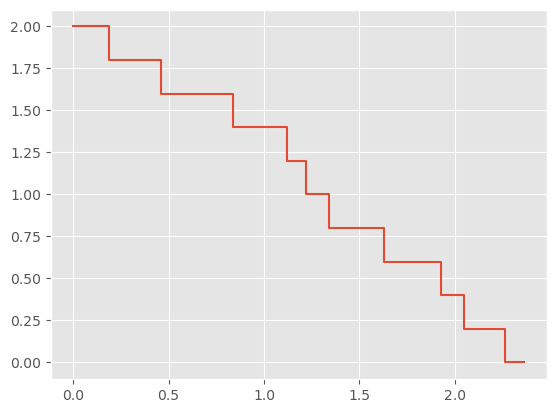

In [21]:
# specifying parameters
clustering_method = "complete"


# extracting stable ranks

f = D3.get_h0sr(sample = sample_ob1, clustering_method=clustering_method)

# plotting the stable ranks

f.plot()